# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | hadibu
Processing Record 3 of Set 1 | nuuk
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | port saint john's
Processing Record 7 of Set 1 | monduli
Processing Record 8 of Set 1 | kataragama
City not found. Skipping...
Processing Record 9 of Set 1 | guneysu
Processing Record 10 of Set 1 | bosaso
Processing Record 11 of Set 1 | ingeniero jacobacci
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | tofol
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | queenstown
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | howard springs
Processing Record 19 of Set 1 | island harbour
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | edi

Processing Record 39 of Set 4 | zaozersk
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | bougouni
Processing Record 42 of Set 4 | ramhormoz
Processing Record 43 of Set 4 | flying fish cove
Processing Record 44 of Set 4 | balsas
Processing Record 45 of Set 4 | tabou
Processing Record 46 of Set 4 | xicotencatl
Processing Record 47 of Set 4 | tinogasta
Processing Record 48 of Set 4 | nova vicosa
Processing Record 49 of Set 4 | saskatoon
Processing Record 0 of Set 5 | ilulissat
Processing Record 1 of Set 5 | harper
Processing Record 2 of Set 5 | al bahah
Processing Record 3 of Set 5 | aral
Processing Record 4 of Set 5 | mocimboa
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | buka
Processing Record 7 of Set 5 | olinda
Processing Record 8 of Set 5 | mhamid
Processing Record 9 of Set 5 | pangoa
Processing Record 10 of Set 5 | tolanaro
Processing Record 11 of Set 5 | stephenville
Processing Record 12 of Set 5 | songea
Processing Record 13 of

Processing Record 31 of Set 8 | susuman
Processing Record 32 of Set 8 | labuan
Processing Record 33 of Set 8 | tucuma
Processing Record 34 of Set 8 | puerto ayora
Processing Record 35 of Set 8 | toga village
City not found. Skipping...
Processing Record 36 of Set 8 | kapa'a
Processing Record 37 of Set 8 | aqadyr
Processing Record 38 of Set 8 | ulladulla
Processing Record 39 of Set 8 | dryden
Processing Record 40 of Set 8 | guangyuan
Processing Record 41 of Set 8 | aras-asan
Processing Record 42 of Set 8 | brooks
Processing Record 43 of Set 8 | mora
Processing Record 44 of Set 8 | ulsteinvik
Processing Record 45 of Set 8 | zheleznogorsk-ilimskiy
Processing Record 46 of Set 8 | gilgit
Processing Record 47 of Set 8 | bafoulabe
Processing Record 48 of Set 8 | yaren
Processing Record 49 of Set 8 | paphos
Processing Record 0 of Set 9 | vila franca do campo
Processing Record 1 of Set 9 | alo
Processing Record 2 of Set 9 | hamilton
Processing Record 3 of Set 9 | siniscola
Processing Record 4 o

Processing Record 21 of Set 12 | badger
Processing Record 22 of Set 12 | myeik
Processing Record 23 of Set 12 | sovetsk
Processing Record 24 of Set 12 | plettenberg bay
Processing Record 25 of Set 12 | ilheus
Processing Record 26 of Set 12 | teknaf
Processing Record 27 of Set 12 | baiti
Processing Record 28 of Set 12 | sao miguel do araguaia
Processing Record 29 of Set 12 | barra do corda
Processing Record 30 of Set 12 | xilin hot
Processing Record 31 of Set 12 | nebraska city
Processing Record 32 of Set 12 | vikhorevka
Processing Record 33 of Set 12 | kemijarvi
Processing Record 34 of Set 12 | taoudenni
Processing Record 35 of Set 12 | rubtsovsk
Processing Record 36 of Set 12 | parauapebas
Processing Record 37 of Set 12 | kingscliff
Processing Record 38 of Set 12 | lorengau
Processing Record 39 of Set 12 | mugumu
Processing Record 40 of Set 12 | acarau
Processing Record 41 of Set 12 | piacabucu
Processing Record 42 of Set 12 | bressanone
Processing Record 43 of Set 12 | kiruna
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,242.91,100,44,1.44,RU,1700434618
1,hadibu,12.6500,54.0333,299.33,73,9,4.60,YE,1700434651
2,nuuk,64.1835,-51.7216,273.49,69,40,7.72,GL,1700434380
3,ribeira grande,38.5167,-28.7000,287.47,80,96,11.62,PT,1700434611
4,nova sintra,14.8667,-24.7167,296.05,70,95,4.49,CV,1700434644


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,242.91,100,44,1.44,RU,1700434618
1,hadibu,12.6500,54.0333,299.33,73,9,4.60,YE,1700434651
2,nuuk,64.1835,-51.7216,273.49,69,40,7.72,GL,1700434380
3,ribeira grande,38.5167,-28.7000,287.47,80,96,11.62,PT,1700434611
4,nova sintra,14.8667,-24.7167,296.05,70,95,4.49,CV,1700434644


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

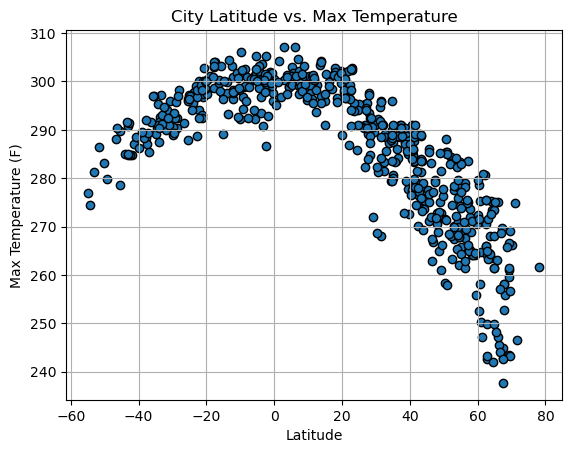

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

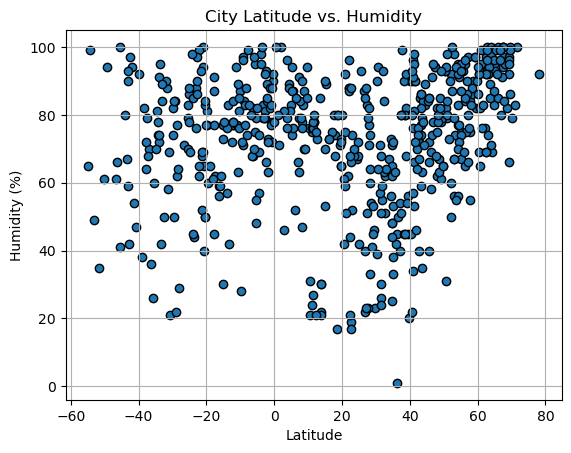

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

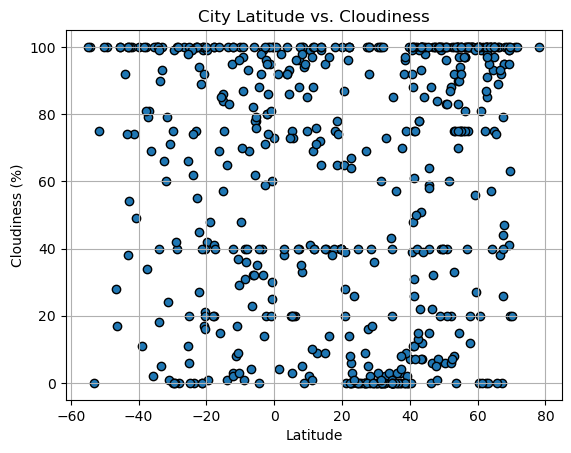

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

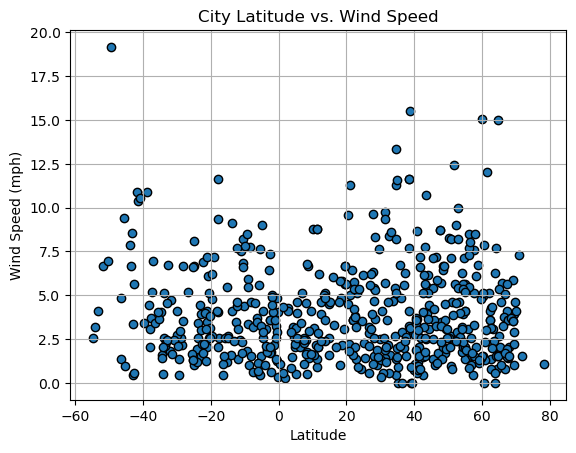

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,242.91,100,44,1.44,RU,1700434618
1,hadibu,12.6500,54.0333,299.33,73,9,4.60,YE,1700434651
2,nuuk,64.1835,-51.7216,273.49,69,40,7.72,GL,1700434380
3,ribeira grande,38.5167,-28.7000,287.47,80,96,11.62,PT,1700434611
4,nova sintra,14.8667,-24.7167,296.05,70,95,4.49,CV,1700434644


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port saint john's,-31.6229,29.5448,294.15,88,79,4.73,ZA,1700434620
6,monduli,-3.3000,36.4500,290.89,83,99,1.88,TZ,1700434932
9,ingeniero jacobacci,-41.3427,-69.5448,286.97,54,74,10.40,AR,1700434934
10,port-aux-francais,-49.3500,70.2167,279.86,94,100,19.17,TF,1700434599
12,puerto natales,-51.7236,-72.4875,286.40,35,75,6.69,CL,1700434597


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7662654248343236


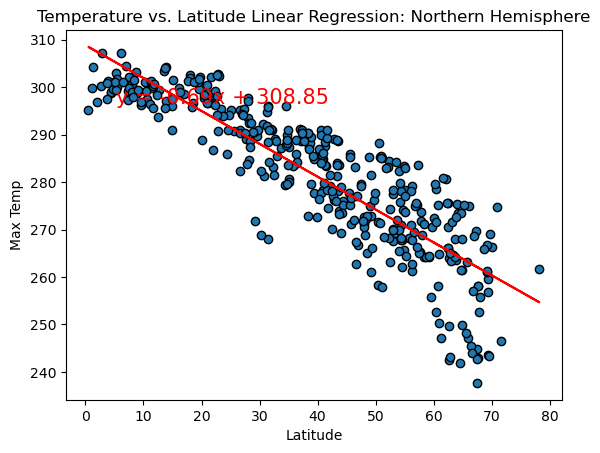

In [23]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Northern Hemisphere temperature vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temperature vs. Latitude Linear Regression: Northern Hemisphere", (0.1, 0.8))


The r-squared is: 0.5761461080551862


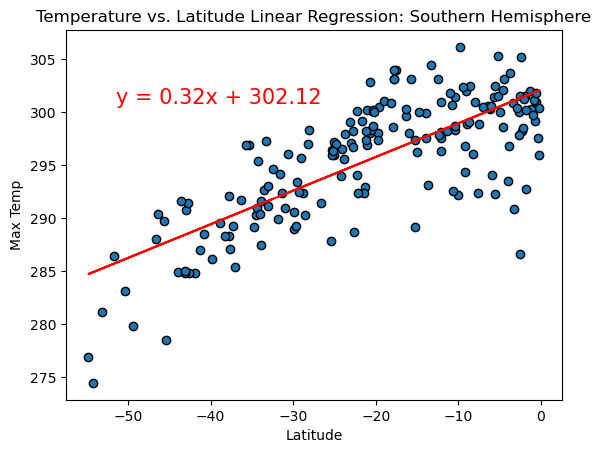

In [26]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Southern Hemisphere temperature vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temperature vs. Latitude Linear Regression: Southern Hemisphere", (0.1, 0.8))


**Discussion about the linear relationship:**  based on the provided linear regression analysis, there is a clear negative correlation between latitude and maximum temperature in the Northern Hemisphere. As latitude increases (moving towards the North Pole), the model predicts a decrease in maximum temperature. Keep in mind that while the linear regression provides a simplified model, actual temperature patterns are influenced by various factors including seasonality, geography, and local climate conditions.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12790412369266155


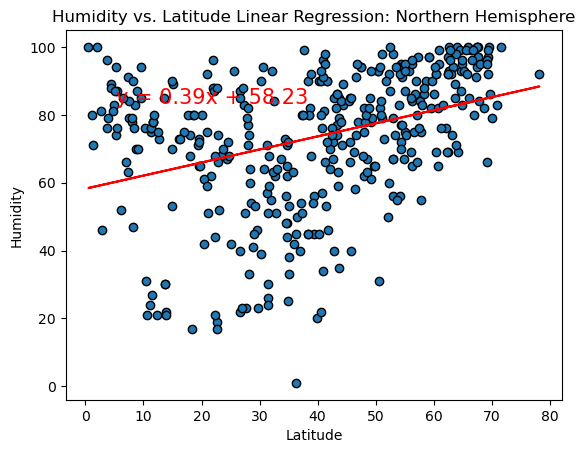

In [24]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Northern Hemisphere humidity vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Latitude Linear Regression: Northern Hemisphere", (0.1, 0.8))


The r-squared is: 0.05165621607147349


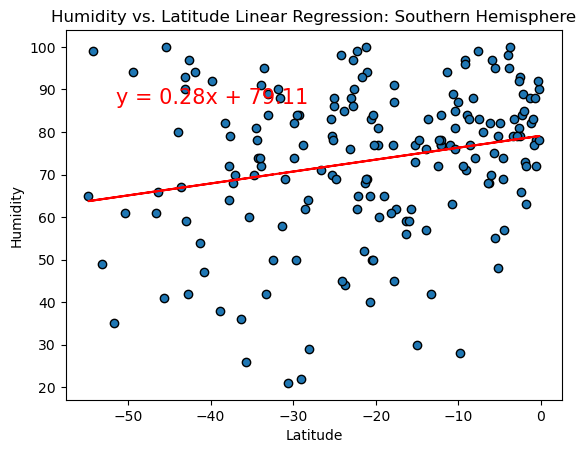

In [25]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Southern Hemisphere humidity vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs. Latitude Linear Regression: Southern Hemisphere", (0.1, 0.8))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.058642439333106255


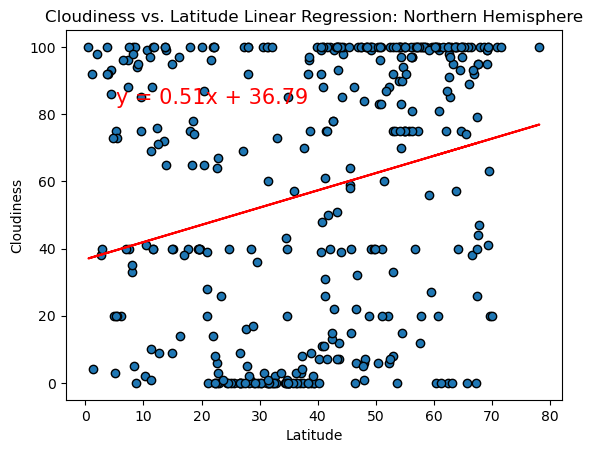

In [27]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Northern Hemisphere cloudiness vs. latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude Linear Regression: Northern Hemisphere", (0.1, 0.8))


The r-squared is: 0.006393758393327178


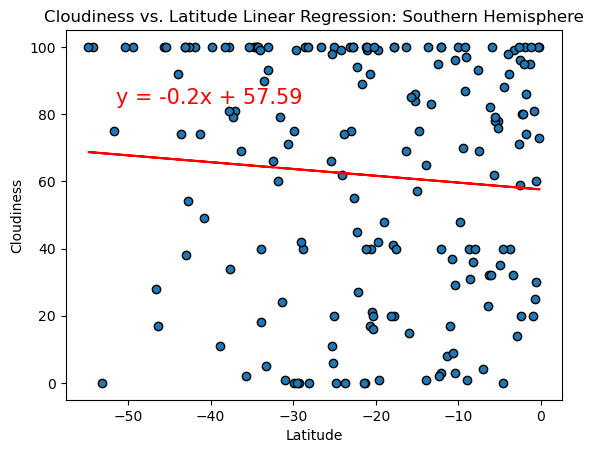

In [28]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Southern Hemisphere cloudiness vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude Linear Regression: Southern Hemisphere", (0.1, 0.8))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001083139685476187


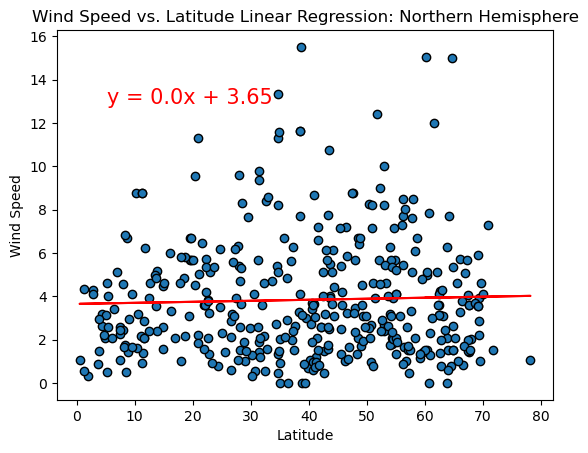

In [30]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Wind Speed vs. Latitude Linear Regression: Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude Linear Regression: Northern Hemisphere", (0.1, 0.8))


The r-squared is: 0.03652946161027634


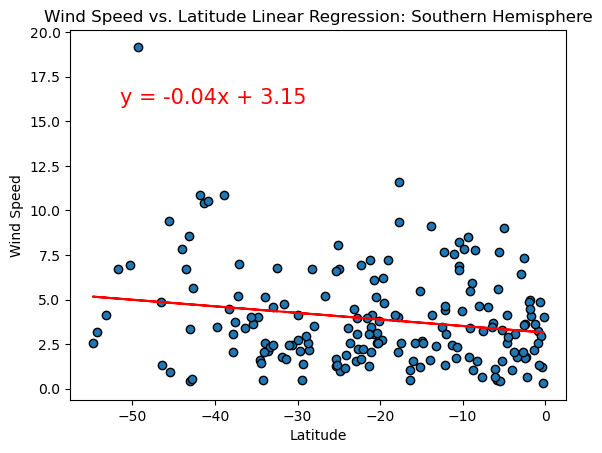

In [31]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y values
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o")

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red", xycoords='axes fraction')

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)

    # Show plot
    plt.show()

# Example usage for Wind Speed vs. Latitude Linear Regression: Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude Linear Regression: Southern Hemisphere", (0.1, 0.8))


**Discussion about the linear relationship:** YOUR RESPONSE HERE